# Level 4 Python (Extra)
--------------|-------|
|Danylo Zdoryk| 233305|
|Dmytro Shelest| 226453|
|Gracjan Grala| 210192|
|Jan Kisielewicz| 210221|

---
# Data preparation
---

---
## Importing libraries

In [220]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

---
## Creating a dictionary with paths of file for each month of 2019

In [221]:
folder_path = "data_for_extra_exercise\\"
year = '2019'
files = {
    # 'January': f'{folder_path}Sales_January_{year}.csv',
    'February': f'{folder_path}Sales_February_{year}.csv',
    'March': f'{folder_path}Sales_March_{year}.csv',
    'April': f'{folder_path}Sales_April_{year}.csv',
    'May': f'{folder_path}Sales_May_{year}.csv',
    'June': f'{folder_path}Sales_June_{year}.csv',
    'July': f'{folder_path}Sales_July_{year}.csv',
    'August': f'{folder_path}Sales_August_{year}.csv',
    'September': f'{folder_path}Sales_September_{year}.csv',
    'October': f'{folder_path}Sales_October_{year}.csv',
    'November': f'{folder_path}Sales_November_{year}.csv',
    'December': f'{folder_path}Sales_December_{year}.csv',
}
files

{'February': 'data_for_extra_exercise\\Sales_February_2019.csv',
 'March': 'data_for_extra_exercise\\Sales_March_2019.csv',
 'April': 'data_for_extra_exercise\\Sales_April_2019.csv',
 'May': 'data_for_extra_exercise\\Sales_May_2019.csv',
 'June': 'data_for_extra_exercise\\Sales_June_2019.csv',
 'July': 'data_for_extra_exercise\\Sales_July_2019.csv',
 'August': 'data_for_extra_exercise\\Sales_August_2019.csv',
 'September': 'data_for_extra_exercise\\Sales_September_2019.csv',
 'October': 'data_for_extra_exercise\\Sales_October_2019.csv',
 'November': 'data_for_extra_exercise\\Sales_November_2019.csv',
 'December': 'data_for_extra_exercise\\Sales_December_2019.csv'}

---
## Reading data and creating data frame using pandas

In [222]:
df = pd.read_csv("data_for_extra_exercise\Sales_January_2019.csv")

for k,v in files.items():
    df = pd.concat([df, pd.read_csv(v)])

#Showing columns info
df.info()
# Showing values
df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


---
## Cleaning data from nulls and other trash

In [223]:
df = df[df['Product'] != 'Product'].dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


---
## Cast 'Order Date' column to datetime64 type.

In [224]:
temp = []
for order in df['Order Date']:
    # print(order)
    if type(order) == float:
        print(order)
    r,l = order.split(' ')
    temp.append(r[:6] + '20' + r[6:] + ' ' + l)
df['Order Date'] = temp
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y %H:%M")
# Showing columns info
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


---
## Getting records from 2019

In [225]:
df = df[pd.DatetimeIndex(df['Order Date']).year == 2019]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


---
## Cast other columns to numeric types

In [226]:
# df['Quantity Ordered'] = df['Quantity Ordered'].astype(np.int8)
# df['Order ID'] = df['Order ID'].astype(np.int64)
# df['Price Each'] = df['Price Each'].astype(np.float16)
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  int64         
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


---
## Check if there are null values

In [227]:
missing_values_count = df.isnull().sum()
missing_values_count

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


## Data preparation has been done.
---


---
# Exercises
---

---
## Exercise 1. Prepare a statement showing the totals of the sales amounts for each recorded day in 2019.
---

In [228]:
result = df[['Product', 'Quantity Ordered', 'Price Each', 'Order Date']].groupby([df['Order Date'].dt.date, 'Product', 'Price Each']).sum().reset_index()
result['Multiplication'] = result['Quantity Ordered'] * result['Price Each']
# result
pd.options.display.float_format = '{:.3f}'.format
total_sum = result[['Order Date', 'Multiplication']].groupby('Order Date').sum().rename(columns={'Multiplication':'Total'}).reset_index()
total_sum
# for_plot = total_sum.copy()
# for_plot['Month'] = pd.DatetimeIndex(total_sum['Order Date']).month
# for_plot['Day'] = pd.DatetimeIndex(total_sum['Order Date']).day
# a = for_plot[['Month', 'Day', 'Total']]
# for_plot.groupby('Order Date')

,Order Date,Total
0,2019-01-01,65681.940
1,2019-01-02,70813.200
2,2019-01-03,47046.200
3,2019-01-04,62012.210
4,2019-01-05,46524.630
...,...,...
360,2019-12-27,126628.050
361,2019-12-28,134015.500
362,2019-12-29,156024.620
363,2019-12-30,152319.810


### Visualization (heatmap)

In [229]:
# ax = sns.heatmap(for_plot[['Month', 'Day', 'Total']].unstack())
# month = pd.DatetimeIndex(df['Order Date']).month.unique()
# month


---
## Exercise 2. Prepare a list of the 3 products that were sold the most, their total sum of sales amounts and the number of items sold for each quarter of 2019.
---

In [230]:
top = df[['Product', 'Quantity Ordered', 'Price Each']].groupby(['Product', 'Price Each']).sum().reset_index()
top.sort_values('Quantity Ordered', ascending=False).head(3)

temp = df[df['Product'].isin(top.sort_values('Quantity Ordered', ascending=False).head(3)['Product'])]
result = temp[['Product', 'Quantity Ordered', 'Price Each', 'Order Date']].groupby([temp['Order Date'].dt.quarter, 'Product', 'Price Each']).sum().reset_index().rename(columns={'Order Date':'Quarter'})
result['Total'] = result['Quantity Ordered'] * result['Price Each']
result


,Quarter,Product,Price Each,Quantity Ordered,Total
0,1,AA Batteries (4-pack),3.840,5375,20640.000
1,1,AAA Batteries (4-pack),2.990,6046,18077.540
2,1,USB-C Charging Cable,11.950,4881,58327.950
3,2,AA Batteries (4-pack),3.840,7301,28035.840
4,2,AAA Batteries (4-pack),2.990,8028,24003.720
5,2,USB-C Charging Cable,11.950,6012,71843.400
6,3,AA Batteries (4-pack),3.840,5670,21772.800
7,3,AAA Batteries (4-pack),2.990,6309,18863.910
8,3,USB-C Charging Cable,11.950,4905,58614.750
9,4,AA Batteries (4-pack),3.840,9289,35669.760


---
## Visualization 1
---

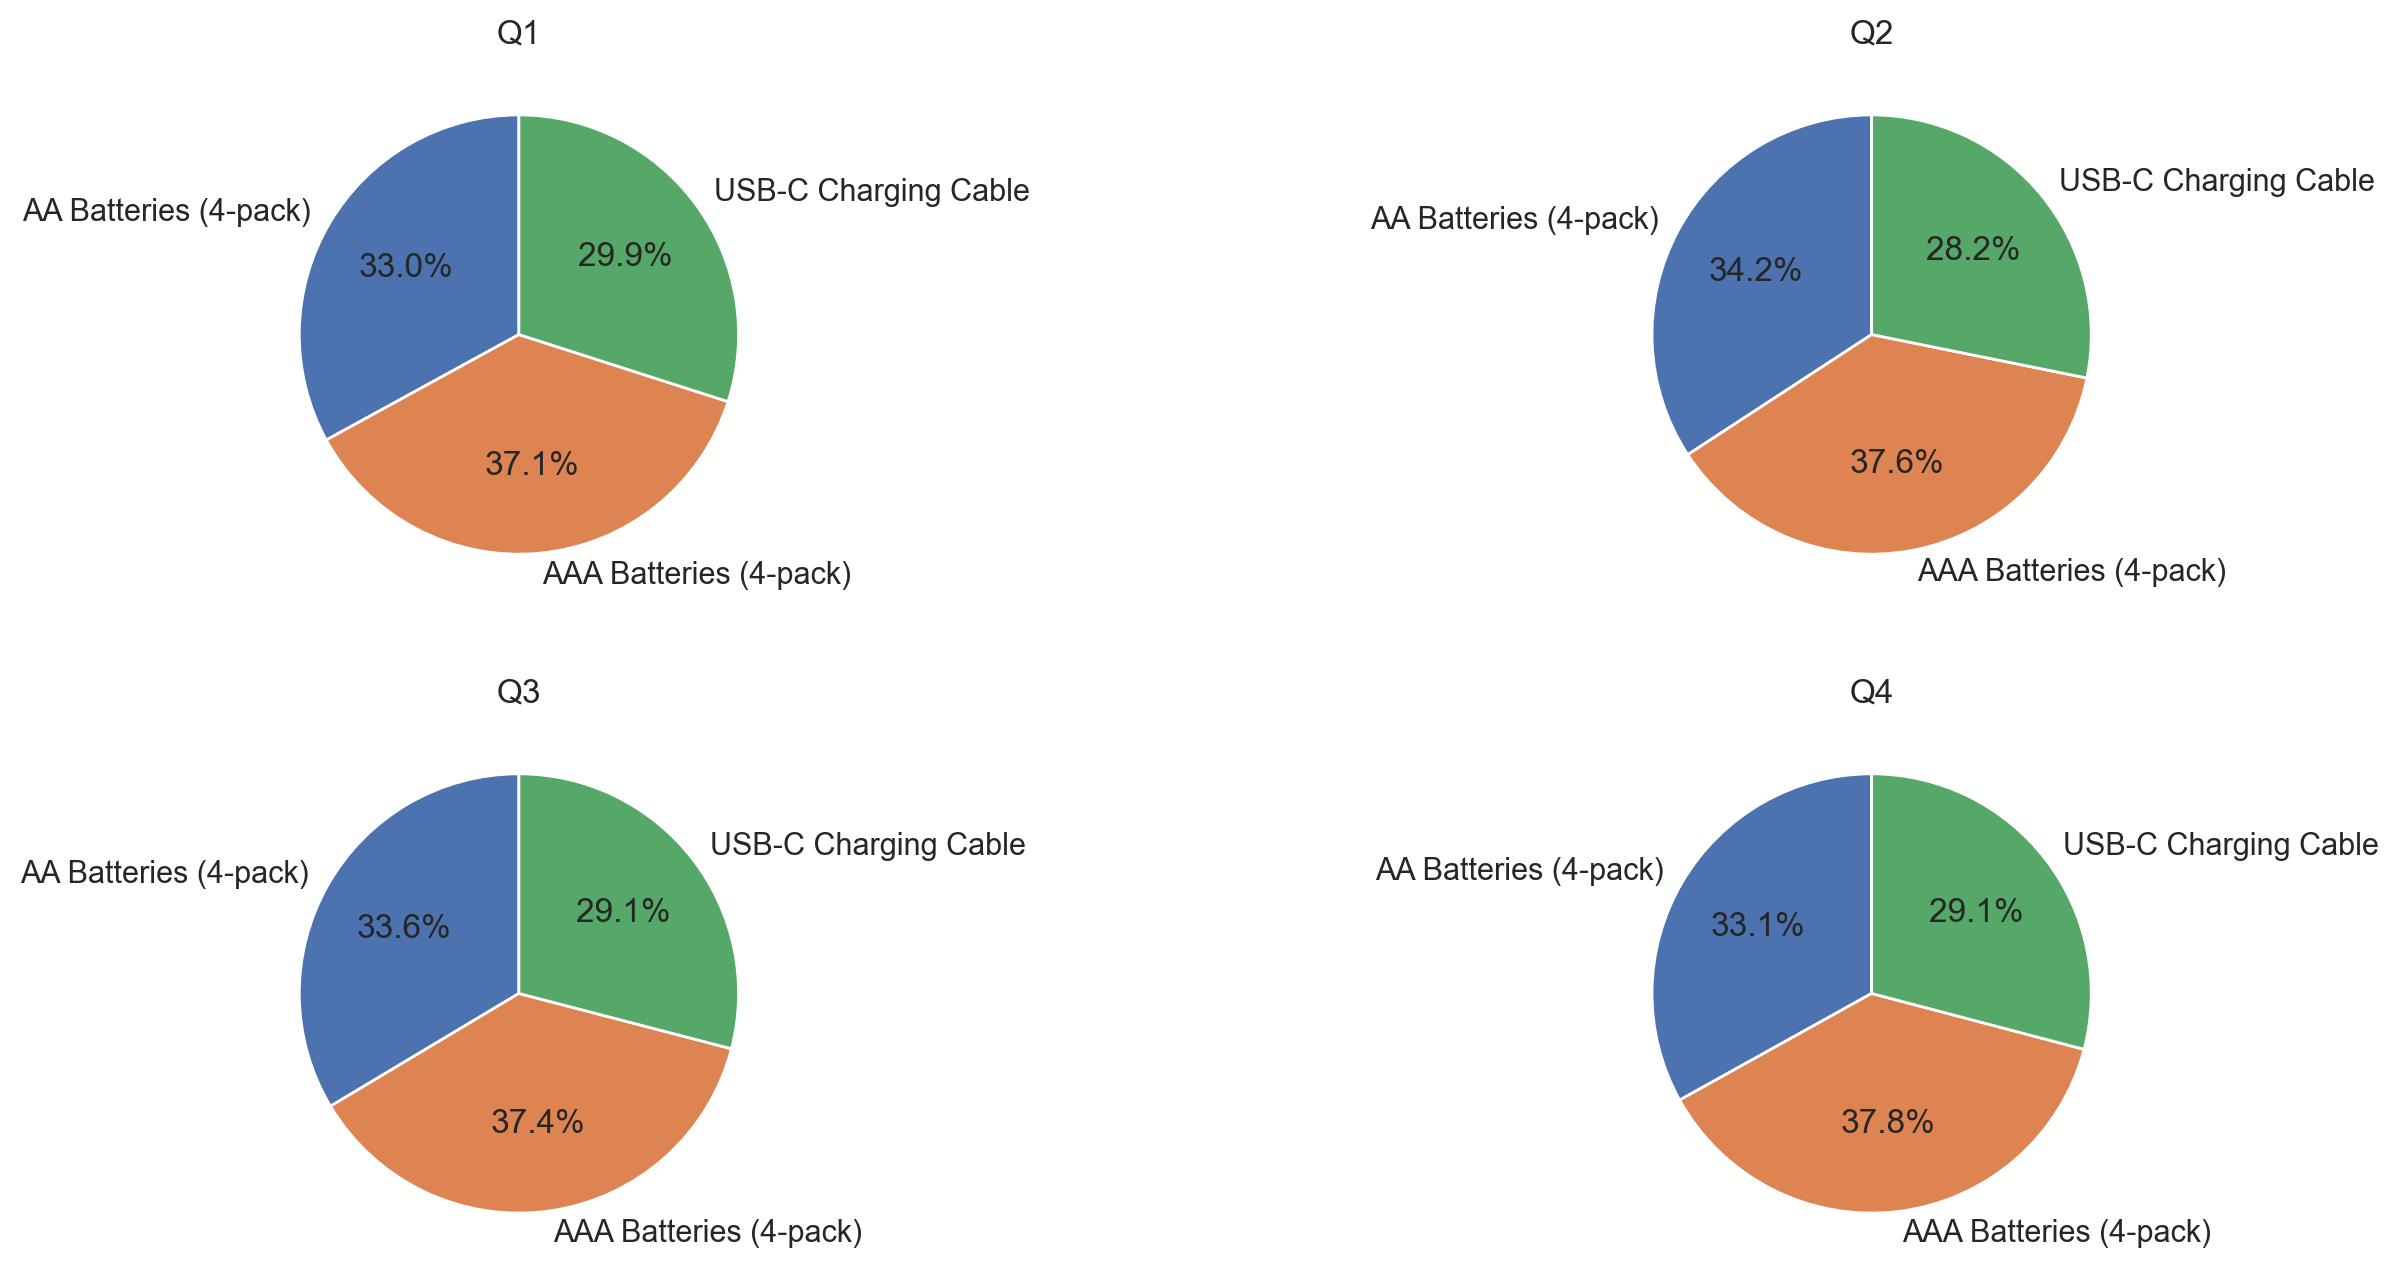

In [231]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pie(result.loc[:2]['Quantity Ordered'], labels=result.loc[:2].Product, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[0, 1].pie(result.loc[3:5]['Quantity Ordered'], labels=result.loc[3:5].Product, autopct='%1.1f%%',
          shadow=False, startangle=90)
axs[1, 0].pie(result.loc[6:8]['Quantity Ordered'], labels=result.loc[6:8].Product, autopct='%1.1f%%',
         shadow=False, startangle=90)
axs[1, 1].pie(result.loc[9:12]['Quantity Ordered'], labels=result.loc[9:12].Product, autopct='%1.1f%%',
          shadow=False, startangle=90)
fig.set_size_inches(16,8)
fig.set_dpi(200)
axs[0, 0].title.set_text('Q1')
axs[0, 1].title.set_text('Q2')
axs[1, 0].title.set_text('Q3')
axs[1, 1].title.set_text('Q4')
plt.show()

---
## Visualization 2
---

## Data preparation

In [232]:
quarter_sum = result[['Quarter', 'Product', 'Quantity Ordered', 'Total']].groupby(['Quarter']).sum().reset_index()
for_plot_2 = result[['Quarter', 'Product', 'Quantity Ordered', 'Total']]

# print(quarter_sum)

counter = 0
for_plot_2['Quantity Percentage'] = 0
for_plot_2['Total Percentage'] = 0

for q in range(4):
    for item in range(3):
        for_plot_2['Total Percentage'].loc[counter] = for_plot_2[for_plot_2['Quarter'] == q+1]['Total']/quarter_sum.loc[q]['Total'] * 100
        for_plot_2['Quantity Percentage'].loc[counter] = for_plot_2[for_plot_2['Quarter'] == q+1]['Quantity Ordered']/quarter_sum.loc[q]['Quantity Ordered'] * 100
        counter +=1

for_plot_2.loc[:2]['Total Percentage']

0   21.268
1   18.628
2   60.104
Name: Total Percentage, dtype: float64

## Actual visualization

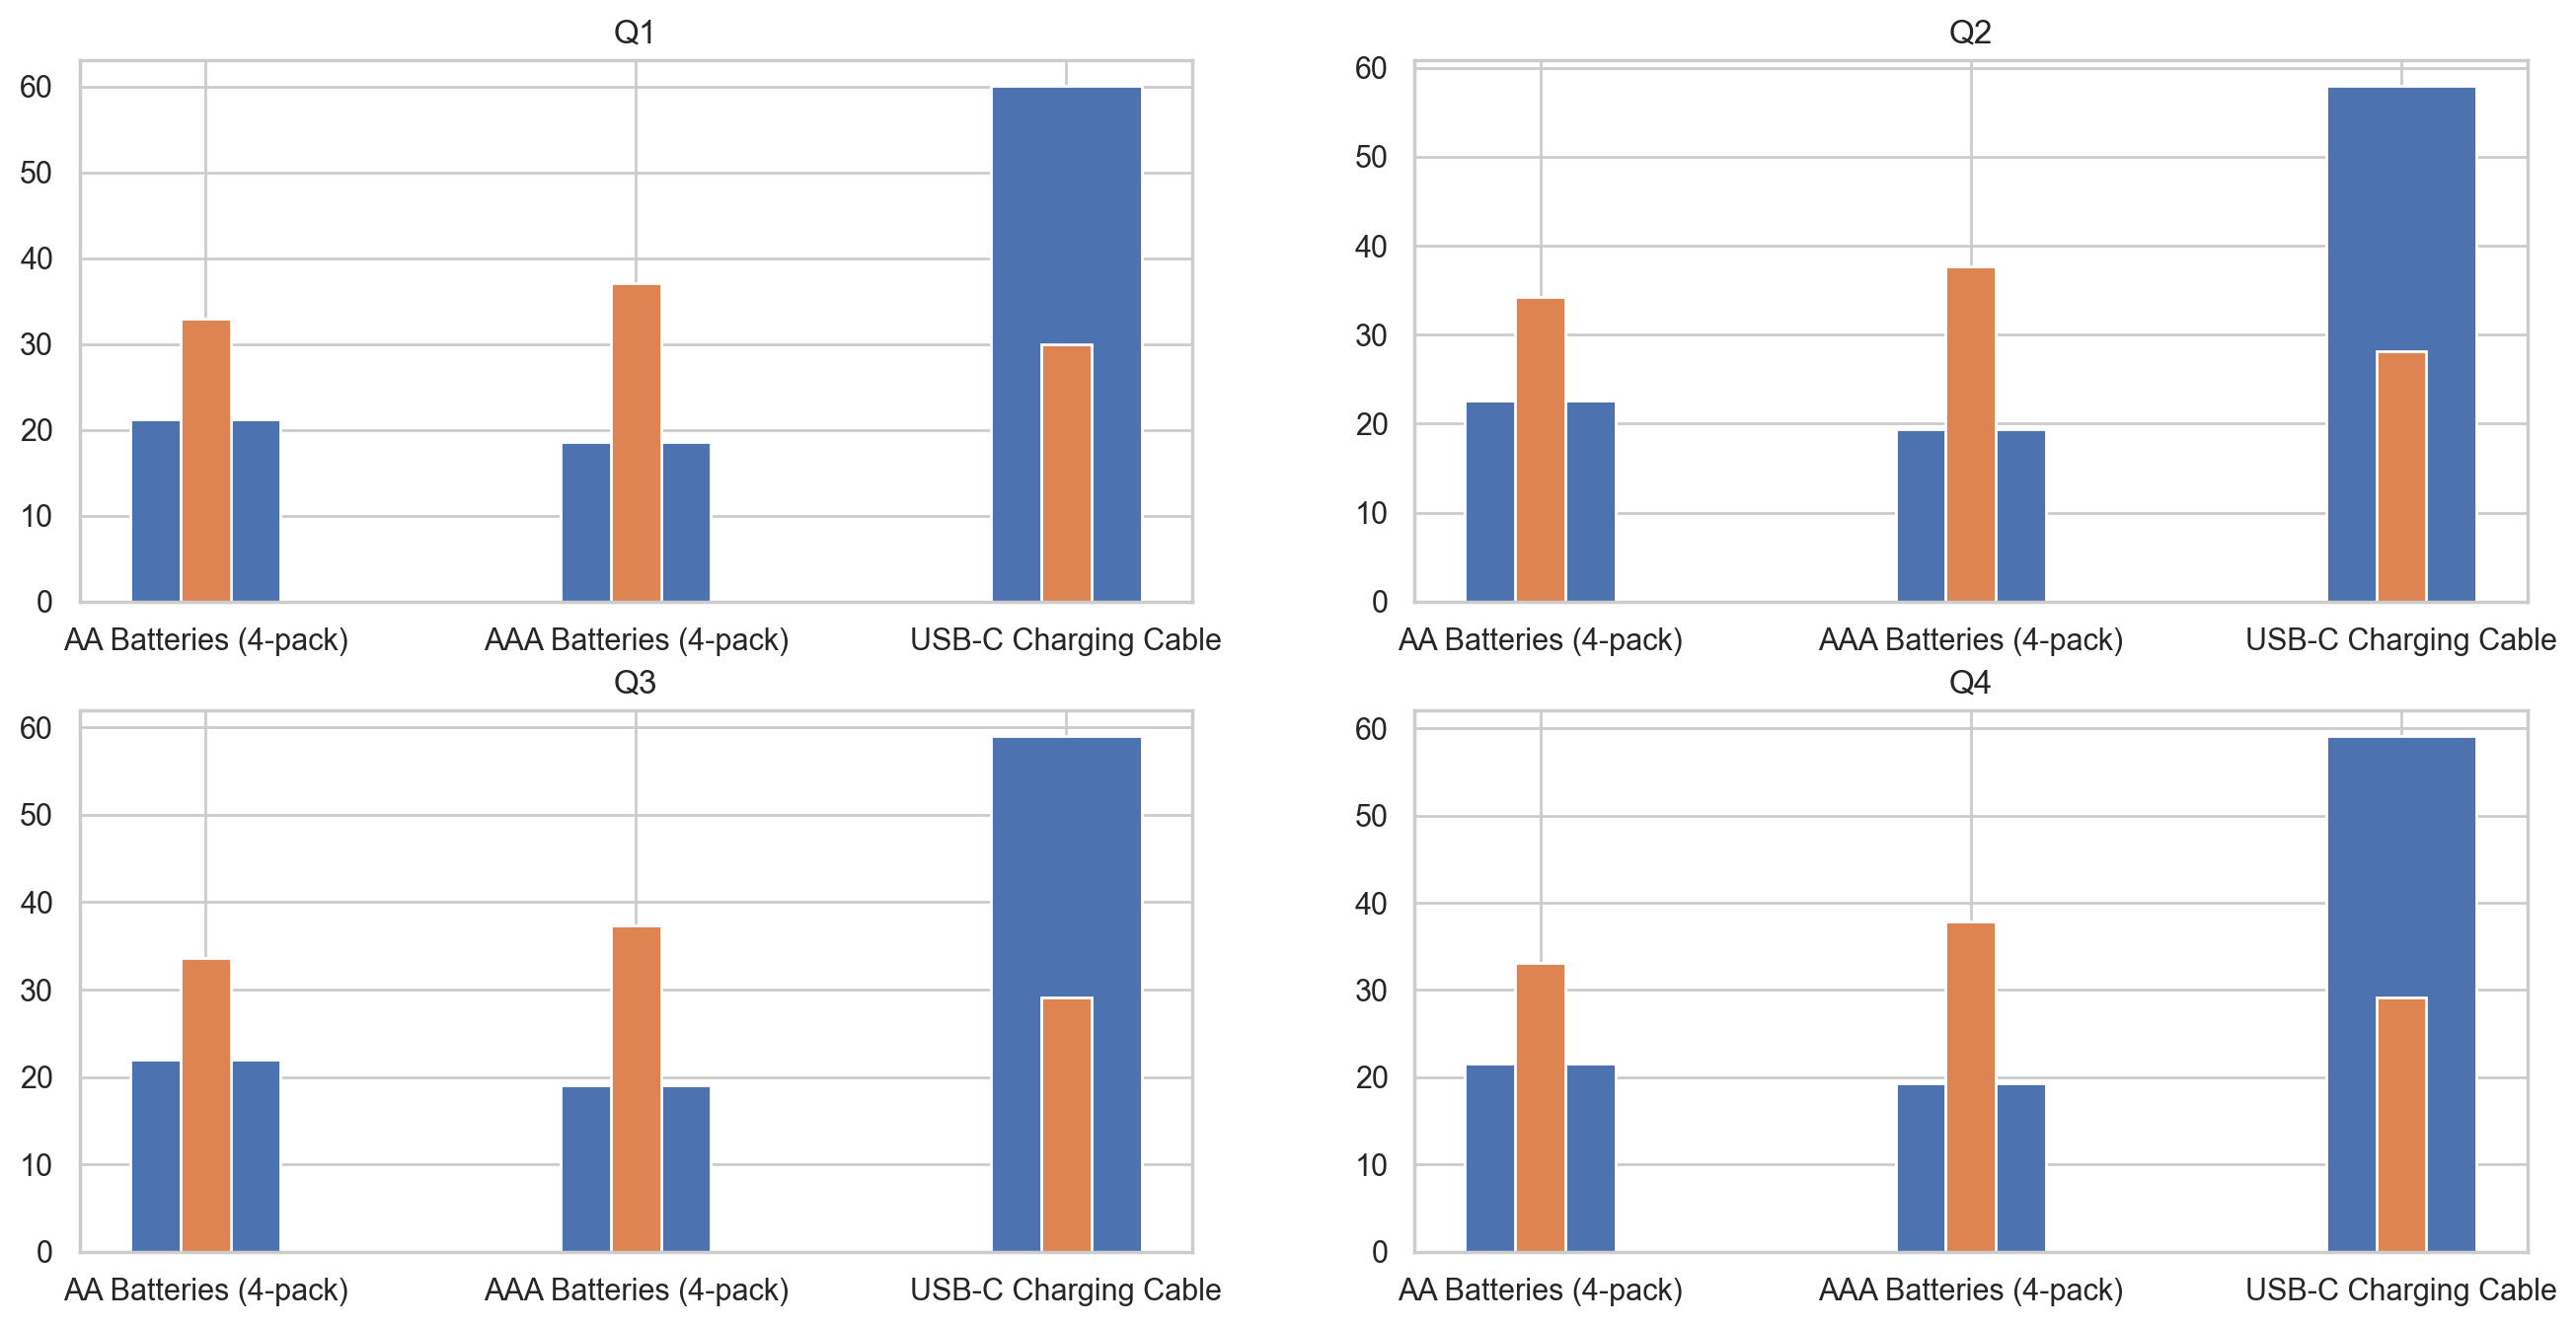

In [233]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, axs = plt.subplots(2,2)


axs[0,0].bar(for_plot_2.loc[:2]['Product'], for_plot_2.loc[:2]['Total Percentage'], width,
             label='Total Percentage', align='center')
axs[0,0].bar(for_plot_2.loc[:2]['Product'], for_plot_2.loc[:2]['Quantity Percentage'], width/3, label='Quantity Percentage', align='center')

axs[0,1].bar(for_plot_2.loc[3:5]['Product'], for_plot_2.loc[3:5]['Total Percentage'], width,
             label='Total Percentage', align='center')
axs[0,1].bar(for_plot_2.loc[3:5]['Product'], for_plot_2.loc[3:5]['Quantity Percentage'], width/3, label='Quantity Percentage', align='center')

axs[1,0].bar(for_plot_2.loc[6:8]['Product'], for_plot_2.loc[6:8]['Total Percentage'], width,
             label='Total Percentage', align='center')
axs[1,0].bar(for_plot_2.loc[6:8]['Product'], for_plot_2.loc[6:8]['Quantity Percentage'], width/3, label='Quantity Percentage', align='center')

axs[1,1].bar(for_plot_2.loc[9:12]['Product'], for_plot_2.loc[9:12]['Total Percentage'], width,
             label='Total Percentage', align='center')
axs[1,1].bar(for_plot_2.loc[9:12]['Product'], for_plot_2.loc[9:12]['Quantity Percentage'], width/3, label='Quantity Percentage', align='center')


fig.set_size_inches(16,8)
fig.set_dpi(200)
axs[0, 0].title.set_text('Q1')
axs[0, 1].title.set_text('Q2')
axs[1, 0].title.set_text('Q3')
axs[1, 1].title.set_text('Q4')
plt.show()

---
## Exercise 3. Prepare a statement showing the 5 states that are most often repeated in order addresses and their share in the number of all orders in 2019.
---


In [234]:
temp = df.copy()
# temp
temp['State'] = temp['Purchase Address'].str[-8:-6]
result = temp['State'].value_counts().reset_index()
total = result['State'].sum()
result['Percentage'] = result['State'] / total * 100
exercise_3 = result.rename(columns={'State':'Amount','index':'State'}).head()
exercise_3

,State,Amount,Percentage
0,CA,74324,39.977
1,NY,24866,13.375
2,TX,24721,13.297
3,MA,19930,10.720
4,GA,14881,8.004


---
## Visualization 3.1
---


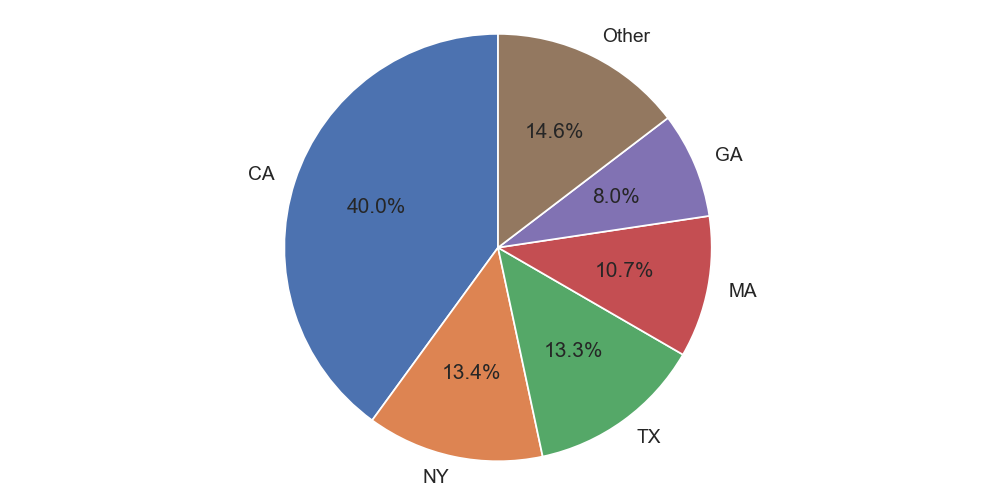

In [235]:
for_plot_3 = exercise_3.copy()
other = result[~result['index'].isin(for_plot_3['State'])].sum()
for_plot_3.loc[5] = ['Other', other['State'], other['Percentage']]

# explode = (0, 0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
# fig1(figsize=(8, 6), dpi=80)
ax1.pie(for_plot_3.Amount, labels=for_plot_3.State, autopct='%1.1f%%',
        shadow=False, startangle=90)
fig1.set_size_inches(10,5)
fig1.set_dpi(125)
ax1.axis('equal')
plt.title('')
plt.show()

---
## Visualization 3.2
---

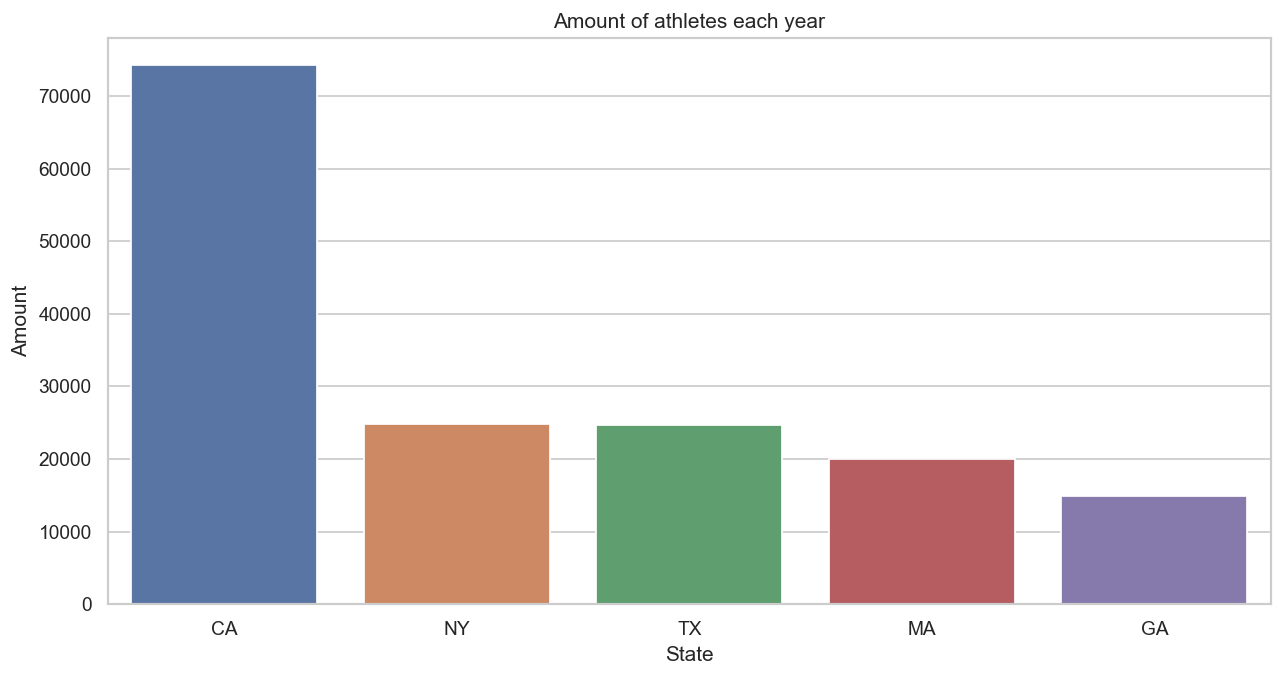

In [236]:
plt.figure(figsize=(12,6), dpi=125)
plt.title('Amount of athletes each year')
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.barplot(x=exercise_3['State'], y=exercise_3['Amount'])
plt.show()